In [1]:
import os
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import cv2

In [2]:
rpm = 333.333333333333/2 # rpm
width = 2000 # mm
speed = 5000 # mm/min
BiskRadius = 130
SiskRadius = 1.5

zoom = 2

In [3]:
rps = rpm / 60
rpf = rps / 60
speedps = speed / 60
speedpf = speedps / 60

In [4]:
A = np.arange(0, 4*np.pi, rpf) - np.pi/2
B = np.linspace(0, 4*speedpf, len(A))

A.shape, B.shape

((272,), (272,))

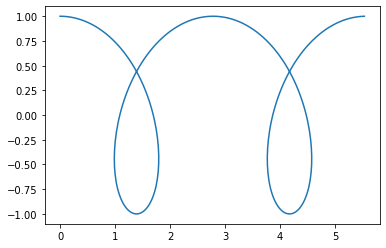

In [5]:
plt.plot(np.cos(A)+B, -np.sin(A))

In [62]:
theta = - np.pi / 2
cx, cy = 150, 250

img = np.zeros(np.array([2500 * zoom, 5000 * zoom, 3]), np.uint8)

os.makedirs('frames', exist_ok = True)
divs = 600

for i in range(360):
    print('{:04d}'.format(i), end = '\r')
    theta1 = theta + 2*np.pi*rpf
    thetas = np.linspace(theta, theta1, divs+1)
    
    cx1 = cx + speedpf
    cxs = np.linspace(cx, cx1, divs+1)
    
    cy1 = cy
    for j in range(10):
        for _nx, _ny in zip([0, 340, 0, 340, 0, 340, 0, 340], 263*np.arange(8)):
            xs = (BiskRadius * np.cos(thetas + 2*j*np.pi/10) + cxs + _nx).reshape((-1, 1))
            ys = (BiskRadius * np.sin(thetas + 2*j*np.pi/10) + cy + _ny).reshape((-1, 1))
            pts = np.concatenate((xs, ys), axis = 1)
            pts = pts.reshape((-1, 1, 2))
            img = cv2.polylines(img, np.int32([pts * zoom]), False, (255, 255, 255), int(2 * SiskRadius * zoom))

        # xs = (BiskRadius * np.cos(thetas + 2*j*np.pi/10) + cxs + 340).reshape((-1, 1))
        # ys = (BiskRadius * np.sin(thetas + 2*j*np.pi/10) + cy + 263).reshape((-1, 1))
        # pts = np.concatenate((xs, ys), axis = 1)
        # img = cv2.polylines(img, np.int32([pts * zoom]), False, 255, int(2 * SiskRadius * zoom))
    cv2.imwrite('frames/{:04d}.png'.format(i), img)
    cx, cy, theta = cx1, cy1, theta1

In [64]:
image_folder = 'frames'
video_name = 'CyclicPainting.avi'

images = [img for img in os.listdir(image_folder) if img.endswith('.png')]
# images.reverse()
frame = cv2.imread(os.path.join(image_folder, images[0]))
# height, width, layers = frame.shape
height, width, layers = 1000, 2000, 3

# images = [f for f in images if int(os.path.splitext(f)[0]) % 2 == 0]
# fourcc = cv2.VideoWriter_fourcc(*'DIVX')
video = cv2.VideoWriter(video_name, 0, 60, (width,height))

ti = 0
for image in images:
    timg = cv2.imread(os.path.join(image_folder, image))
    timg = cv2.resize(timg, dsize=(2000, 1000), interpolation=cv2.INTER_AREA)
    video.write(timg)
    # plt.imshow(cv2.imread(os.path.join(image_folder, image)))
    # plt.show()
    print('{:03d}'.format(ti), end = '\r')
    ti += 1

cv2.destroyAllWindows()
video.release()